In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Exam_Score_Prediction.csv")

In [3]:
df.head(5)

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [4]:
df.tail(5)

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
19995,19997,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,19998,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19999,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,20000,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0
19999,20001,20,male,b.sc,7.50,47.9,yes,7.5,poor,coaching,medium,moderate,71.0


In [8]:
df.drop(columns=['student_id','gender','course','internet_access','sleep_quality','study_method','exam_difficulty'],axis=1,inplace=True)

In [9]:
df.head(1)

,age,study_hours,class_attendance,sleep_hours,facility_rating,exam_score
0,17,2.78,92.9,7.4,low,58.9


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               20000 non-null  int64  
 1   study_hours       20000 non-null  float64
 2   class_attendance  20000 non-null  float64
 3   sleep_hours       20000 non-null  float64
 4   facility_rating   20000 non-null  object 
 5   exam_score        20000 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 937.6+ KB


In [11]:
df.describe()

,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,20.473300,4.007604,70.017365,7.00856,62.513225
std,2.284458,2.308313,17.282262,1.73209,18.908491
min,17.000000,0.080000,40.600000,4.10000,19.599000
25%,18.000000,2.000000,55.100000,5.50000,48.800000
50%,20.000000,4.040000,69.900000,7.00000,62.600000
75%,22.000000,6.000000,85.000000,8.50000,76.300000
max,24.000000,7.910000,99.400000,9.90000,100.000000


In [14]:
df.isnull().sum()

age                 0
study_hours         0
class_attendance    0
sleep_hours         0
facility_rating     0
exam_score          0
dtype: int64

In [16]:
df[df.duplicated()]

,age,study_hours,class_attendance,sleep_hours,facility_rating,exam_score


In [17]:
df['facility_rating'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [20]:
rating = {"low":1,"medium":2,"high":3}
df["facility_rating_num"] = df["facility_rating"].map(rating)
df["facility_rating_num"]

0        1
1        2
2        3
3        1
4        1
        ..
19995    1
19996    2
19997    1
19998    2
19999    2
Name: facility_rating_num, Length: 20000, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  20000 non-null  int64  
 1   study_hours          20000 non-null  float64
 2   class_attendance     20000 non-null  float64
 3   sleep_hours          20000 non-null  float64
 4   facility_rating      20000 non-null  object 
 5   exam_score           20000 non-null  float64
 6   facility_rating_num  20000 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 1.1+ MB


In [26]:
df_analysis = df[["age","study_hours","class_attendance","sleep_hours","exam_score","facility_rating_num"]]
df_analysis.head()

,age,study_hours,class_attendance,sleep_hours,exam_score,facility_rating_num
0,17,2.78,92.9,7.4,58.9,1
1,23,3.37,64.8,4.6,54.8,2
2,22,7.88,76.8,8.5,90.3,3
3,20,0.67,48.4,5.8,29.7,1
4,20,0.89,71.6,9.8,43.7,1


<Figure size 1000x600 with 0 Axes>

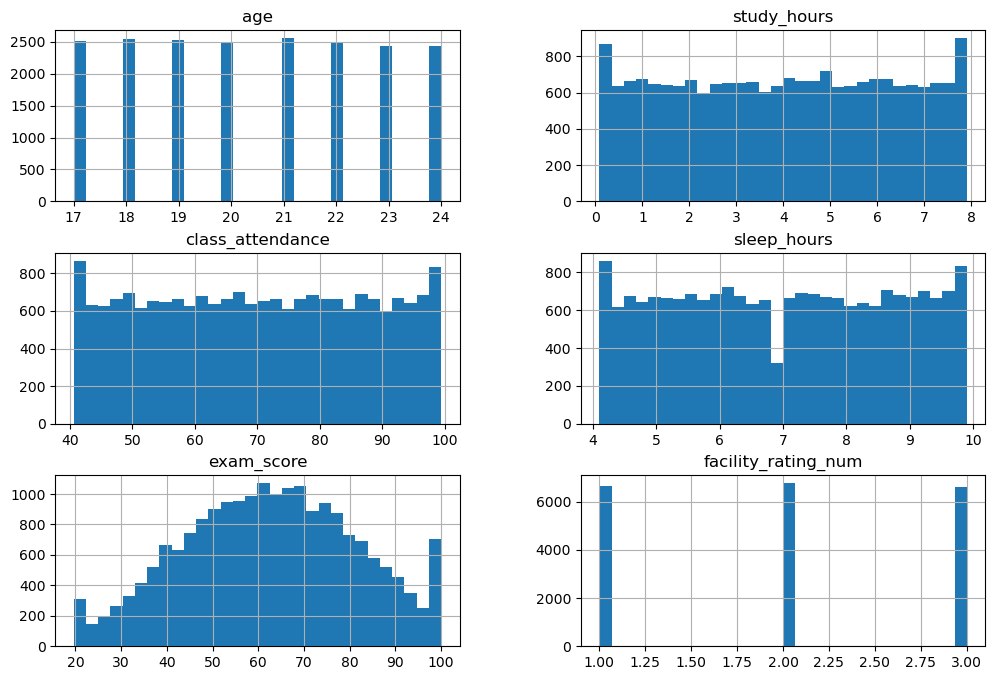

In [27]:
df_analysis.hist(figsize=(12, 8), bins=30)
plt.show()

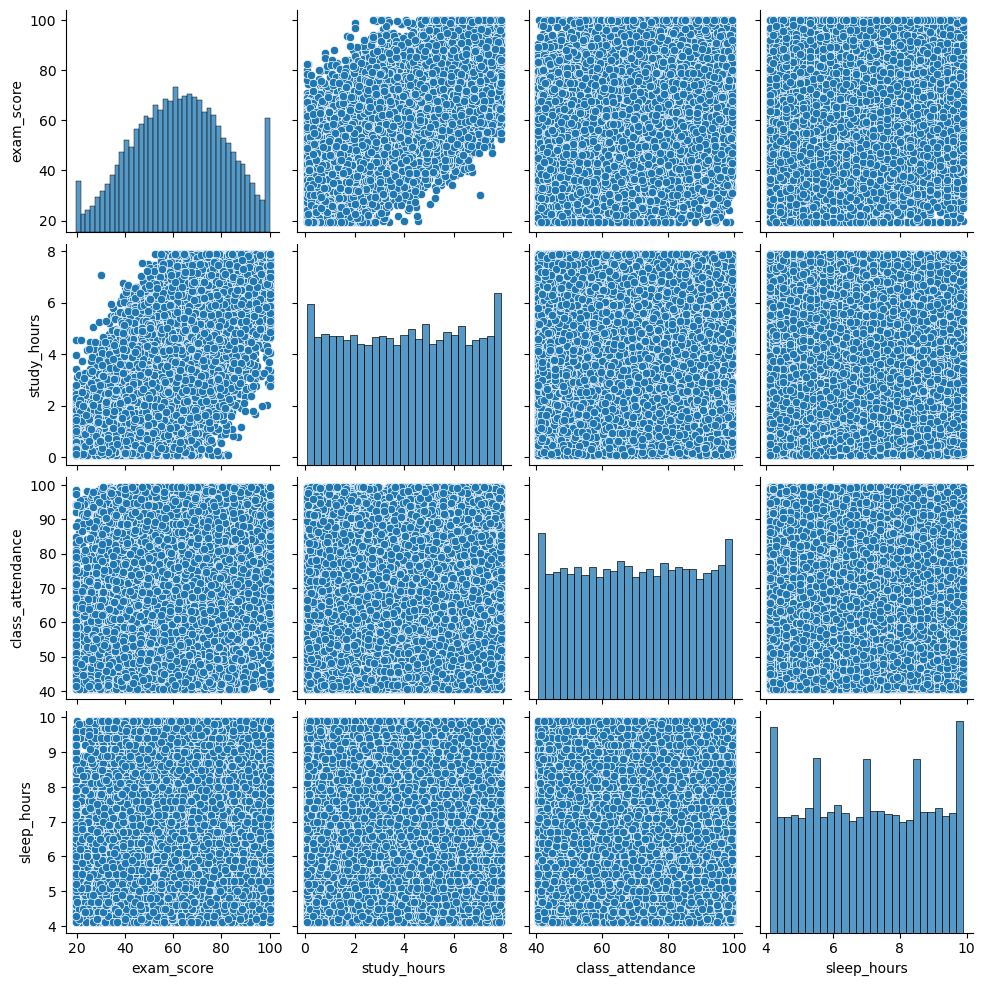

In [48]:
sns.pairplot(df_analysis[['exam_score', 'study_hours', 'class_attendance', 'sleep_hours']])
plt.show()

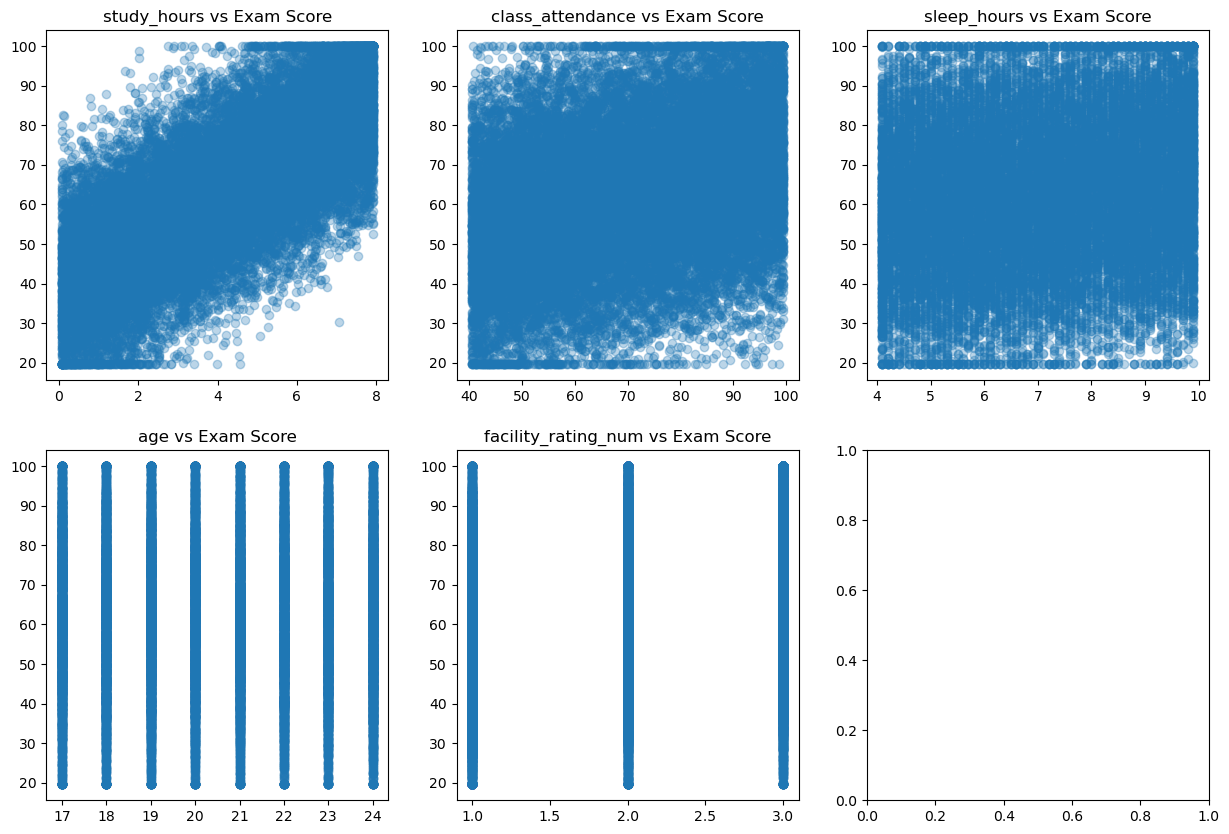

In [49]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
variables = ['study_hours', 'class_attendance', 'sleep_hours', 'age', 'facility_rating_num']

for i, var in enumerate(variables):
    row, col = divmod(i, 3)
    axes[row, col].scatter(df_analysis[var], df_analysis['exam_score'], alpha=0.3)
    axes[row, col].set_title(f'{var} vs Exam Score')
plt.show()

In [47]:
df_analysis.corr()

,age,study_hours,class_attendance,sleep_hours,exam_score,facility_rating_num
age,1.000000,0.002955,0.008449,-0.000385,0.006522,0.009201
study_hours,0.002955,1.000000,-0.001645,-0.004533,0.717788,-0.006144
class_attendance,0.008449,-0.001645,1.000000,0.007187,0.308850,0.003939
sleep_hours,-0.000385,-0.004533,0.007187,1.000000,0.133222,-0.006989
exam_score,0.006522,0.717788,0.308850,0.133222,1.000000,0.162923
facility_rating_num,0.009201,-0.006144,0.003939,-0.006989,0.162923,1.000000


In [ ]:
df_analysis.drop(columns=['age'],axis=1,inplace=True)

In [54]:
df_analysis.head()

,study_hours,class_attendance,sleep_hours,exam_score,facility_rating_num
0,2.78,92.9,7.4,58.9,1
1,3.37,64.8,4.6,54.8,2
2,7.88,76.8,8.5,90.3,3
3,0.67,48.4,5.8,29.7,1
4,0.89,71.6,9.8,43.7,1


Regression

In [55]:
x = df_analysis[['study_hours','class_attendance','sleep_hours','facility_rating_num']]
y = df_analysis['exam_score']

In [56]:
x.head()

,study_hours,class_attendance,sleep_hours,facility_rating_num
0,2.78,92.9,7.4,1
1,3.37,64.8,4.6,2
2,7.88,76.8,8.5,3
3,0.67,48.4,5.8,1
4,0.89,71.6,9.8,1


In [57]:
from sklearn.model_selection import train_test_split


In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [59]:
x_train.shape

(15000, 4)

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [68]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [69]:
linear.coef_

array([13.56167224,  5.85780784,  2.52722074,  3.17523974])

In [71]:
linear.intercept_

np.float64(62.51687020000001)

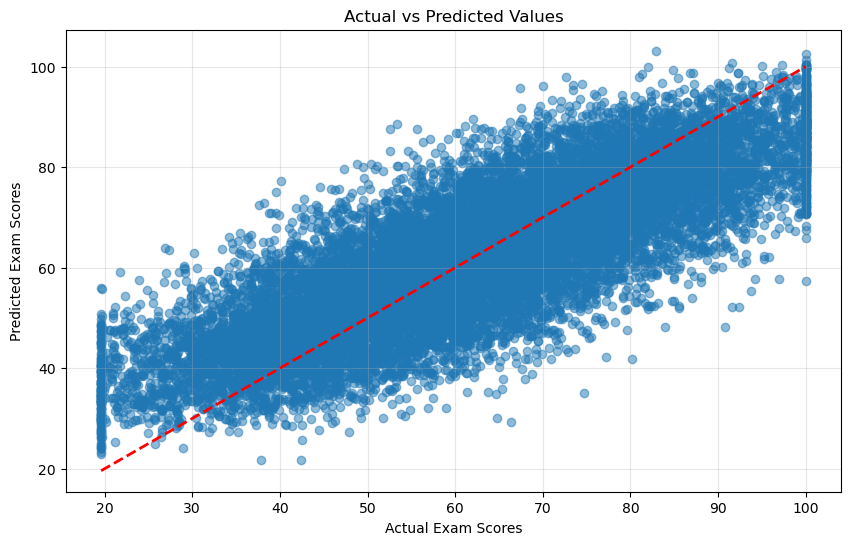

In [ ]:
y_train_pred = linear.predict(x_train)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', linewidth=2)
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Actual vs Predicted Values')
plt.grid(True, alpha=0.3)
plt.show()

In [83]:
y_pred = linear.predict(x_test)
y_pred

array([40.22836528, 69.40759962, 53.01983585, ..., 74.22079009,
       46.35778813, 57.13968785])

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(f"mse: {mse}, mae :{mae}, rmse : {rmse}")

mse: 123.06868866234561, mae :9.007485201553823, rmse : 11.093632798247182


In [89]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score


0.6590105752474626

In [90]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6587375106430562

In [96]:
import statsmodels.api as sm
x_test = sm.add_constant(x_test)
model = sm.OLS(y_train,x_train).fit()
prediction = model.predict(x_test)
prediction

array([40.22836528, 69.40759962, 53.01983585, ..., 74.22079009,
       46.35778813, 57.13968785])

In [97]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             exam_score   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     7170.
Date:                Sat, 27 Dec 2025   Prob (F-statistic):               0.00
Time:                        17:36:50   Log-Likelihood:                -57336.
No. Observations:               15000   AIC:                         1.147e+05
Df Residuals:                   14995   BIC:                         1.147e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.5169      0.090    692.084      0.000      62.340      62.694
x1            13.5617      0.090    150.125      0.000      13.385      13.739
x2             5.8578      0.090     64.843      0.000       5.681       6.035
x3             2.5272      0.090     27.974      0.000       2.350       2.704
x4             3.1752      0.090     35.147      0.000       2.998       3.352
==============================================================================
Omnibus:                        6.204   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                5.780
Skew:                           0.010   Prob(JB):                       0.0556
Kurtosis:                       2.906   Cond. No.                         1.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
df_analysis.head(1)

,study_hours,class_attendance,sleep_hours,exam_score,facility_rating_num
0,2.78,92.9,7.4,58.9,1


In [101]:
linear.predict(scaler.transform([[4,75,6,3]]))

c:\Users\Arushi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([66.56271196])

In [104]:
import pickle
from joblib import dump, load

In [105]:
with open('exam_score_model.pkl', 'wb') as f:
    pickle.dump(linear, f)

# Save the scaler  
with open('exam_score_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)